### [ 엑셀 읽어와서 분석하기 ]

In [216]:
## 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 파일 경로 설정
DATA_FILE = './Data/데이터.xlsx'

## 파일 읽기
dataDF = pd.read_excel(DATA_FILE)
display(dataDF)

## 정보
dataDF.info()

,순번,년도,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,...,전비/연비,세금,보험료(26세 이상),5년 배터리 교체비용,타이어 교체비용,엔진오일 교체비용,브레이크오일 교체비용,보조배터리 교체비용,구동배터리 교체비용,요소수
0,167,2019,718 박스터,포르쉐,휘발유,1988,자동7,9.4,4등급,179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1218,2019,718 박스터,포르쉐,휘발유,1988,자동7,9.3,5등급,186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2113,2020,718 박스터,포르쉐,휘발유,1988,자동7,9.4,4등급,179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2528,2020,718 박스터,포르쉐,휘발유,1988,자동7,9.3,5등급,186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3695,2021,718 박스터,포르쉐,휘발유,1988,자동7,9.3,5등급,186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12445,12447,2024,한국상용1톤롱바디EV트럭,현대,전기,0,없음,2.795,5등급,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12446,9089,2023,한국쓰리축1톤롱바디EV트럭(봉고),주식회사 한국쓰리축,전기,0,없음,2.8,5등급,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12447,12448,2024,한국쓰리축1톤롱바디EV트럭(봉고),주식회사 한국쓰리축,전기,0,없음,2.895,5등급,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12448,9090,2023,한국쓰리축1톤롱바디EV트럭(포터),주식회사 한국쓰리축,전기,0,없음,2.8,5등급,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12450 entries, 0 to 12449
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   순번           12450 non-null  object 
 1   년도           12450 non-null  object 
 2   모델명          12450 non-null  object 
 3   제조사          12450 non-null  object 
 4   유종           12450 non-null  object 
 5   배기량          12450 non-null  object 
 6   변속형식         12450 non-null  object 
 7   복합연비         12450 non-null  object 
 8   등급           12450 non-null  object 
 9   CO2배출량       12450 non-null  object 
 10  소중대/형        0 non-null      float64
 11  평균주행거리       0 non-null      float64
 12  전비/연비        0 non-null      float64
 13  세금           0 non-null      float64
 14  보험료(26세 이상)  0 non-null      float64
 15  5년 배터리 교체비용  0 non-null      float64
 16  타이어 교체비용     0 non-null      float64
 17  엔진오일 교체비용    0 non-null      float64
 18  브레이크오일 교체비용  0 non-null      float64
 19  보조배터

### 공통 작업  <hr>
1. 평균 주행 거리
2. 에너지 단가
3. 연비 (또는 전비)
4. CO2 배출량
5. 5년 유지비 

In [217]:
## 하이브리드 출력 = > 전기+휘발유
dataDF = dataDF[(dataDF['유종'] == '전기+휘발유') | (dataDF['등급'] == 'PHEV') | (dataDF['등급'] == 'HEV') ]
dataDF

,순번,년도,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,...,전비/연비,세금,보험료(26세 이상),5년 배터리 교체비용,타이어 교체비용,엔진오일 교체비용,브레이크오일 교체비용,보조배터리 교체비용,구동배터리 교체비용,요소수
391,8658,2022,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동7,3 / 11.3,PHEV,45.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,9140,2024,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동,15.535,PHEV,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,9141,2024,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동,15.77,PHEV,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,6591,2022,BMW 320e,BMW,전기+휘발유,1998,자동8,3.3 / 11,PHEV,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
658,7760,2022,BMW 320e,BMW,전기+휘발유,1998,자동8,3.3 / 11,PHEV,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12231,5450,2021,페라리 SF90 Stradale Assetto Fiorano,페라리,전기+휘발유,3990,자동8,2.7 / 7.4,PHEV,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12232,8239,2022,페라리 SF90 Stradale Assetto Fiorano,페라리,전기+휘발유,3990,자동8,2.7 / 7.4,PHEV,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12233,12384,2024,페라리 SF90 Stradale Assetto Fiorano,페라리,전기+휘발유,3990,자동,11.175,PHEV,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12234,12385,2024,페라리 SF90 XX Spider,페라리,전기+휘발유,3990,자동,10.415,PHEV,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 제조사 선택


In [218]:
## 필터링 ##
## 제조사 선택 추출
made_by = ['BMW', 'GM', 'MINI', '기아', '닛산', 
           '르노삼성', '르노코리아자동차(주)', '벤츠', '볼보', '아우디', 
           '테슬라코리아 유한회사', '토요타', '포드', '포르쉐', '폭스바겐', '현대', '혼다']

retDF1 = dataDF[ dataDF['제조사'].isin(made_by) ]
retDF1

,순번,년도,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,...,전비/연비,세금,보험료(26세 이상),5년 배터리 교체비용,타이어 교체비용,엔진오일 교체비용,브레이크오일 교체비용,보조배터리 교체비용,구동배터리 교체비용,요소수
391,8658,2022,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동7,3 / 11.3,PHEV,45.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,9140,2024,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동,15.535,PHEV,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,9141,2024,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동,15.77,PHEV,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,6591,2022,BMW 320e,BMW,전기+휘발유,1998,자동8,3.3 / 11,PHEV,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
658,7760,2022,BMW 320e,BMW,전기+휘발유,1998,자동8,3.3 / 11,PHEV,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,8548,2022,파나메라 4 E-하이브리드 이그제큐티브,포르쉐,전기+휘발유,2894,자동8,2 / 8.3,PHEV,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12007,7225,2022,파나메라 터보 S E-하이브리드,포르쉐,전기+휘발유,3996,자동8,2 / 7.5,PHEV,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12008,12318,2024,파나메라 터보 S E-하이브리드,포르쉐,전기+휘발유,3996,자동,10.545,PHEV,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12009,7380,2022,파나메라 터보 S E-하이브리드 (5인승),포르쉐,전기+휘발유,3996,자동8,2 / 7.5,PHEV,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
## 결측치와 정보 확인 -> unique()
display(retDF1.isnull().count())

retDF1.info()

순번             262
년도             262
모델명            262
제조사            262
유종             262
배기량            262
변속형식           262
복합연비           262
등급             262
CO2배출량         262
소중대/형          262
평균주행거리         262
전비/연비          262
세금             262
보험료(26세 이상)    262
5년 배터리 교체비용    262
타이어 교체비용       262
엔진오일 교체비용      262
브레이크오일 교체비용    262
보조배터리 교체비용     262
구동배터리 교체비용     262
요소수            262
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 391 to 12010
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   순번           262 non-null    object 
 1   년도           262 non-null    object 
 2   모델명          262 non-null    object 
 3   제조사          262 non-null    object 
 4   유종           262 non-null    object 
 5   배기량          262 non-null    object 
 6   변속형식         262 non-null    object 
 7   복합연비         262 non-null    object 
 8   등급           262 non-null    object 
 9   CO2배출량       262 non-null    object 
 10  소중대/형        0 non-null      float64
 11  평균주행거리       0 non-null      float64
 12  전비/연비        0 non-null      float64
 13  세금           0 non-null      float64
 14  보험료(26세 이상)  0 non-null      float64
 15  5년 배터리 교체비용  0 non-null      float64
 16  타이어 교체비용     0 non-null      float64
 17  엔진오일 교체비용    0 non-null      float64
 18  브레이크오일 교체비용  0 non-null      float64
 19  보조배터리 교체비

In [220]:
## NaN 처리
retDF1 = retDF1.fillna(0)

C:\Users\qjadl\AppData\Local\Temp\ipykernel_18028\2505515144.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  retDF1 = retDF1.fillna(0)


### 기본값 설정

In [221]:
## 필요한 열 
# 년도	모델명	제조사	유종	배기량	복합연비	등급	CO2배출량	소중대/형	평균주행거리	세금	
# 보험료(26세 이상)	타이어 교체비용	엔진오일 교체비용	브레이크오일 교체비용	구동배터리 교체비용	요소수	가솔린단가(원/L)	1년 유지비(원)

# 필요없는 열 삭제
retDF1 = retDF1.drop(columns = ['순번'])
retDF1 = retDF1.drop(columns = ['전비/연비'])
retDF1 = retDF1.drop(columns = ['변속형식'])
retDF1 = retDF1.drop(columns = ['보조배터리 교체비용'])
retDF1 = retDF1.drop(columns = ['5년 배터리 교체비용'])


# 기본 세팅 및 컬럼들 초기화 (중간에 값 남아있지 않도록)
retDF1['평균주행거리'] = 15000
retDF1['세금'] = 0
retDF1['보험료(26세 이상)']   = 0
retDF1['타이어 교체비용']     = 0
retDF1['엔진오일 교체비용']   = 0
retDF1['브레이크오일 교체비용'] = 0
retDF1['구동배터리 교체비용'] = 0
retDF1['요소수'] = 0
retDF1['가솔린단가(원/L)'] = 0

# 소/중/대 구분 -> 1027 data_stadard 내용 참고
# ## 소형 : 배기량 1,600cc 미만
# ## 중형 : 배기량 1,600cc 이상 2,000cc 미만
# ## 대형 : 배기량 2,000cc 이상 
retDF1['소중대/형'] = pd.cut(retDF1['배기량'],
                            bins=[0, 1600, 2000, np.inf],
                            labels=['소형', '중형', '대형'],
                            right=False                         ## 경계값 포함하는지 마는지
)


### 연도에 맞는 값 대입하기

In [ ]:
## 해당 연도와 열에 맞는 값 대입하기

## 엔진오일 -> ## 1년에 한번 -> 8 / 10 / 12

## 휘발유 기름값
# 2019 : 1471.89원
# 2020 : 1381.57원
# 2021 : 1590.46원
# 2022 : 1812.39원
# 2023 : 1643.00원
# 2024 : 1653.23원
retDF1.loc[(retDF1['년도'] == 2019), '가솔린단가(원/L)'] = 1471.89
retDF1.loc[(retDF1['년도'] == 2020), '가솔린단가(원/L)'] = 1381.57
retDF1.loc[(retDF1['년도'] == 2021), '가솔린단가(원/L)'] = 1590.46
retDF1.loc[(retDF1['년도'] == 2022), '가솔린단가(원/L)'] = 1812.39
retDF1.loc[(retDF1['년도'] == 2023), '가솔린단가(원/L)'] = 1643.00
retDF1.loc[(retDF1['년도'] == 2024), '가솔린단가(원/L)'] = 1653.23

## 브레이크오일 -> 2년에 한번 -> 1년으로 계산하면(소/중/대) = 7 / 9 / 11
retDF1.loc[(retDF1['소중대/형']) == '소형', '브레이크오일 교체비용'] = 70000
retDF1.loc[(retDF1['소중대/형']) == '중형', '브레이크오일 교체비용'] = 90000
retDF1.loc[(retDF1['소중대/형']) == '대형', '브레이크오일 교체비용'] = 110000

## 세금
retDF1.loc[retDF1['소중대/형']=='소형', '세금'] = retDF1['배기량'] * 182
retDF1.loc[retDF1['소중대/형']=='중형', '세금'] = retDF1['배기량'] * 260
retDF1.loc[retDF1['소중대/형']=='대형', '세금'] = retDF1['배기량'] * 260


### ---------------------------------
### 2019년 
### ---------------------------------
### 2019년 소형
mask = (retDF1['년도'] == 2019) & (retDF1['소중대/형'] == '소형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1460000
retDF1.loc[mask, '타이어 교체비용']       = 700000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 35000
retDF1.loc[mask, '구동배터리 교체비용']   = 2500000 / 5

### 2019년 중형
mask = (retDF1['년도'] == 2019) & (retDF1['소중대/형'] == '중형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1720000
retDF1.loc[mask, '타이어 교체비용']       = 800000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 40000
retDF1.loc[mask, '구동배터리 교체비용']   = 2800000 / 5

### 2019년 대형
mask = (retDF1['년도'] == 2019) & (retDF1['소중대/형'] == '대형')
retDF1.loc[mask, '보험료(26세 이상)']     = 2100000
retDF1.loc[mask, '타이어 교체비용']       = 900000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 45000
retDF1.loc[mask, '구동배터리 교체비용']   = 3200000 / 5


### ---------------------------------
### 2020년
### ---------------------------------
### 2020년 소형
mask = (retDF1['년도'] == 2020) & (retDF1['소중대/형'] == '소형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1420000
retDF1.loc[mask, '타이어 교체비용']       = 720000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 36000
retDF1.loc[mask, '구동배터리 교체비용']   = 2500000 / 5

### 2020년 중형
mask = (retDF1['년도'] == 2020) & (retDF1['소중대/형'] == '중형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1680000
retDF1.loc[mask, '타이어 교체비용']       = 820000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 42000
retDF1.loc[mask, '구동배터리 교체비용']   = 2800000 / 5

### 2020년 대형
mask = (retDF1['년도'] == 2020) & (retDF1['소중대/형'] == '대형')
retDF1.loc[mask, '보험료(26세 이상)']     = 2050000
retDF1.loc[mask, '타이어 교체비용']       = 900000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 45000
retDF1.loc[mask, '구동배터리 교체비용']   = 3200000 / 5


### ---------------------------------
### 2021년
### ---------------------------------
### 2021년 소형
mask = (retDF1['년도'] == 2021) & (retDF1['소중대/형'] == '소형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1350000
retDF1.loc[mask, '타이어 교체비용']       = 740000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 38000
retDF1.loc[mask, '구동배터리 교체비용']   = 2600000 / 5

### 2021년 중형
mask = (retDF1['년도'] == 2021) & (retDF1['소중대/형'] == '중형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1600000
retDF1.loc[mask, '타이어 교체비용']       = 840000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 43000
retDF1.loc[mask, '구동배터리 교체비용']   = 2900000 / 5

### 2021년 대형
mask = (retDF1['년도'] == 2021) & (retDF1['소중대/형'] == '대형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1950000
retDF1.loc[mask, '타이어 교체비용']       = 920000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 47000
retDF1.loc[mask, '구동배터리 교체비용']   = 3300000 / 5


### ---------------------------------
### 2022년
### ---------------------------------
### 2022년 소형
mask = (retDF1['년도'] == 2022) & (retDF1['소중대/형'] == '소형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1200000
retDF1.loc[mask, '타이어 교체비용']       = 760000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 39000
retDF1.loc[mask, '구동배터리 교체비용']   = 2600000 / 5

### 2022년 중형
mask = (retDF1['년도'] == 2022) & (retDF1['소중대/형'] == '중형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1450000
retDF1.loc[mask, '타이어 교체비용']       = 860000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 45000
retDF1.loc[mask, '구동배터리 교체비용']   = 2900000 / 5

### 2022년 대형
mask = (retDF1['년도'] == 2022) & (retDF1['소중대/형'] == '대형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1850000
retDF1.loc[mask, '타이어 교체비용']       = 950000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 48000
retDF1.loc[mask, '구동배터리 교체비용']   = 3400000 / 5


### ---------------------------------
### 2023년
### ---------------------------------
### 2023년 소형
mask = (retDF1['년도'] == 2023) & (retDF1['소중대/형'] == '소형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1120000
retDF1.loc[mask, '타이어 교체비용']       = 800000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 40000
retDF1.loc[mask, '구동배터리 교체비용']   = 2700000 / 5

### 2023년 중형
mask = (retDF1['년도'] == 2023) & (retDF1['소중대/형'] == '중형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1350000
retDF1.loc[mask, '타이어 교체비용']       = 900000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 46000
retDF1.loc[mask, '구동배터리 교체비용']   = 3000000 / 5

### 2023년 대형
mask = (retDF1['년도'] == 2023) & (retDF1['소중대/형'] == '대형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1700000
retDF1.loc[mask, '타이어 교체비용']       = 980000 / 5 
retDF1.loc[mask, '엔진오일 교체비용']     = 50000
retDF1.loc[mask, '구동배터리 교체비용']   = 3500000 / 5 


### ---------------------------------
### 2024년
### ---------------------------------
### 2024년 소형
mask = (retDF1['년도'] == 2024) & (retDF1['소중대/형'] == '소형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1050000
retDF1.loc[mask, '타이어 교체비용']       = 850000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 42000
retDF1.loc[mask, '구동배터리 교체비용']   = 2800000 / 5

### 2024년 중형
mask = (retDF1['년도'] == 2024) & (retDF1['소중대/형'] == '중형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1300000
retDF1.loc[mask, '타이어 교체비용']       = 950000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 48000
retDF1.loc[mask, '구동배터리 교체비용']   = 3000000 / 5 

### 2024년 대형
mask = (retDF1['년도'] == 2024) & (retDF1['소중대/형'] == '대형')
retDF1.loc[mask, '보험료(26세 이상)']     = 1650000
retDF1.loc[mask, '타이어 교체비용']       = 1000000 / 5
retDF1.loc[mask, '엔진오일 교체비용']     = 52000
retDF1.loc[mask, '구동배터리 교체비용']   = 3600000 /5


C:\Users\qjadl\AppData\Local\Temp\ipykernel_18028\2942861045.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1471.89' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  retDF1.loc[(retDF1['년도'] == 2019), '가솔린단가(원/L)'] = 1471.89


In [223]:
# ## 데이터 채워서 만들었으니 진행 해야하는 과정 ##
# ## 1
# # 실제 데이터를 눈으로 확인하기.

# ## 2
# ## 정보 확인
# retDF1.info()

# ## 실제값 확인
# display(retDF1.head(3))

# ## 모든 컬럼 통계값 확인   --> 이걸로 최소값, 최댓값 등을 통해 정보 확인하기 -> 결측치 확인 & 타입 확인하고 맞게 변환하기 & 가로행이 똑같으면 중복 허용해야하는지 확인하기
# display(retDF1.describe(include='all'))

In [224]:
## 인덱스 0부터 재설정
dataDF = dataDF.reset_index(drop=True)
dataDF['순번'] = dataDF.index + 1
dataDF

,순번,년도,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,...,전비/연비,세금,보험료(26세 이상),5년 배터리 교체비용,타이어 교체비용,엔진오일 교체비용,브레이크오일 교체비용,보조배터리 교체비용,구동배터리 교체비용,요소수
0,1,2022,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동7,3 / 11.3,PHEV,45.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2024,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동,15.535,PHEV,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2024,A7 55 TFSI e uattro,아우디,전기+휘발유,1984,자동,15.77,PHEV,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022,BMW 320e,BMW,전기+휘발유,1998,자동8,3.3 / 11,PHEV,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022,BMW 320e,BMW,전기+휘발유,1998,자동8,3.3 / 11,PHEV,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,2021,페라리 SF90 Stradale Assetto Fiorano,페라리,전기+휘발유,3990,자동8,2.7 / 7.4,PHEV,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,297,2022,페라리 SF90 Stradale Assetto Fiorano,페라리,전기+휘발유,3990,자동8,2.7 / 7.4,PHEV,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,298,2024,페라리 SF90 Stradale Assetto Fiorano,페라리,전기+휘발유,3990,자동,11.175,PHEV,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,299,2024,페라리 SF90 XX Spider,페라리,전기+휘발유,3990,자동,10.415,PHEV,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 타입 변환

In [225]:
## 타입 확인하기
dataDF.info()

## 타입 변환 ##
# ## 값 한개씩 확인
# print(retDF1.배기량.unique())
# print(retDF1.CO2배출량.unique())


#### 복합연비, 구동배터리 교체비용
## 타입 변화
for i in ['배기량','CO2배출량']:
    ## 결측값 처리
    retDF1[i] = retDF1[i].fillna(0)
    ## 형 변환
    retDF1[i] = retDF1[i].astype('int64')  ## 범위가 벗어나서 큰걸로 해줘야함


# 문자열(범주형) 데이터
cat_cols = ['년도', '모델명', '제조사', '유종', '등급']
for c in cat_cols:
    retDF1[c] = retDF1[c].fillna(0)
    retDF1[c] = retDF1[c].astype('string')


# 실수형 (연비/세금/보험료 등은 소수점 존재 가능)
float_cols = [
    '세금', '보험료(26세 이상)',
    '타이어 교체비용', '엔진오일 교체비용', '브레이크오일 교체비용',
    '구동배터리 교체비용', '요소수'
]
for c in float_cols:
    retDF1[c] = retDF1[c].replace('-', np.nan)  # 혹시 '-' 같은 값이 있으면 NaN 처리
    retDF1[c] = retDF1[c].astype('float64')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   순번           300 non-null    int64  
 1   년도           300 non-null    object 
 2   모델명          300 non-null    object 
 3   제조사          300 non-null    object 
 4   유종           300 non-null    object 
 5   배기량          300 non-null    object 
 6   변속형식         300 non-null    object 
 7   복합연비         300 non-null    object 
 8   등급           300 non-null    object 
 9   CO2배출량       300 non-null    object 
 10  소중대/형        0 non-null      float64
 11  평균주행거리       0 non-null      float64
 12  전비/연비        0 non-null      float64
 13  세금           0 non-null      float64
 14  보험료(26세 이상)  0 non-null      float64
 15  5년 배터리 교체비용  0 non-null      float64
 16  타이어 교체비용     0 non-null      float64
 17  엔진오일 교체비용    0 non-null      float64
 18  브레이크오일 교체비용  0 non-null      float64
 19  보조배터리 교체

### 복합연비 계산


In [226]:
#### 복합연비 계산 ####
# 복합 연비는 '/' 있어서 따로 계산
retSR = retDF1[retDF1['년도'].isin(['2019','2020','2021','2022'])]['복합연비']
display(retSR)

EleOil = retSR.str.split('/',expand=True)
EleOil = EleOil.astype('float')

## ex) 3.4 / 9
electric_eff = EleOil[0]   
oil_eff = EleOil[1]         
year_km = 15000     ## 평균 주행거리

# 전기랑 오일 연비 비율
elec_ratio = 0.4
oil_ratio = 0.6

# 전비 연비 주행 거리 (비율곱해서 계산)
elec_km , oil_km = year_km * elec_ratio , year_km * oil_ratio

# 전기-기름 상관관계 (1 kWh = 0.086 L)
elec_to_oil = ( elec_km * 0.086  / electric_eff )              # 전기사용량 = 전기주행거리 / 전기연비
oil_L = oil_km / oil_eff                                     # 휘발유사용량 = 휘발유주행거리 / 휘발유연비

# 총 연비
total_km_per_L = year_km / (oil_L + elec_to_oil)    # 평균 거리 / (기름 주행거리 + 전기->기름 전환 주행거리)

total_km_per_L = total_km_per_L.astype('float')

retDF1['복합연비'] = total_km_per_L



391      3 / 11.3
657      3.3 / 11
658      3.3 / 11
680      3.4/11.8
681      3.4/11.8
           ...   
11969       2/8.3
11970     2 / 8.3
11971     2 / 8.3
12007     2 / 7.5
12009     2 / 7.5
Name: 복합연비, Length: 186, dtype: object

In [227]:
## 변환된 타입 확인
retDF1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 391 to 12010
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   년도           262 non-null    string  
 1   모델명          262 non-null    string  
 2   제조사          262 non-null    string  
 3   유종           262 non-null    string  
 4   배기량          262 non-null    int64   
 5   복합연비         186 non-null    float64 
 6   등급           262 non-null    string  
 7   CO2배출량       262 non-null    int64   
 8   소중대/형        262 non-null    category
 9   평균주행거리       262 non-null    int64   
 10  세금           262 non-null    float64 
 11  보험료(26세 이상)  262 non-null    float64 
 12  타이어 교체비용     262 non-null    float64 
 13  엔진오일 교체비용    262 non-null    float64 
 14  브레이크오일 교체비용  262 non-null    float64 
 15  구동배터리 교체비용   262 non-null    float64 
 16  요소수          262 non-null    float64 
 17  가솔린단가(원/L)   262 non-null    float64 
dtypes: category(1), float64(9), int

In [228]:
## 오름차순으로 정렬하기
retDF1 = retDF1.sort_values(by=['소중대/형','모델명','년도'])
display(retDF1)

,년도,모델명,제조사,유종,배기량,복합연비,등급,CO2배출량,소중대/형,평균주행거리,세금,보험료(26세 이상),타이어 교체비용,엔진오일 교체비용,브레이크오일 교체비용,구동배터리 교체비용,요소수,가솔린단가(원/L)
1174,2019,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1460000.0,140000.0,35000.0,70000.0,500000.0,0.0,1471.89
1175,2020,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1420000.0,144000.0,36000.0,70000.0,500000.0,0.0,1381.57
1176,2021,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1350000.0,148000.0,38000.0,70000.0,520000.0,0.0,1590.46
1177,2022,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1200000.0,152000.0,39000.0,70000.0,520000.0,0.0,1812.39
1178,2024,BMW i8,BMW,전기+휘발유,1499,NaN,PHEV,42,소형,15000,272818.0,1050000.0,170000.0,42000.0,70000.0,560000.0,0.0,1653.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,2022,파나메라 4 E-하이브리드 이그제큐티브,포르쉐,전기+휘발유,2894,11.174538,PHEV,85,대형,15000,752440.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39
12007,2022,파나메라 터보 S E-하이브리드,포르쉐,전기+휘발유,3996,10.288066,PHEV,61,대형,15000,1038960.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39
12008,2024,파나메라 터보 S E-하이브리드,포르쉐,전기+휘발유,3996,NaN,PHEV,61,대형,15000,1038960.0,1650000.0,200000.0,52000.0,110000.0,720000.0,0.0,1653.23
12009,2022,파나메라 터보 S E-하이브리드 (5인승),포르쉐,전기+휘발유,3996,10.288066,PHEV,61,대형,15000,1038960.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39


### 1년 유지비 계산

In [229]:
##
retDF1['1년 유지비(원)'] = ((retDF1['평균주행거리']/retDF1['복합연비'])*retDF1['가솔린단가(원/L)'])+retDF1['세금'] + retDF1['보험료(26세 이상)']+retDF1['타이어 교체비용']+retDF1['엔진오일 교체비용']+retDF1['브레이크오일 교체비용']
# retDF1['1년 유지비(원)'] = retDF1['1년 유지비(원)'].astype(int)

# inf(무한대) → NaN 바꾸기
retDF1['1년 유지비(원)'] = retDF1['1년 유지비(원)'].replace([np.inf, -np.inf], np.nan)

# NaN을 0으로 채우기 (빈 값 때문에 astype(int)에서 안 깨지게)
retDF1['1년 유지비(원)'] = retDF1['1년 유지비(원)'].fillna(0)

# 원 단위 반올림 후 int 변환
retDF1['1년 유지비(원)'] = retDF1['1년 유지비(원)'].round().astype(int)

display(retDF1)
display(retDF1)

,년도,모델명,제조사,유종,배기량,복합연비,등급,CO2배출량,소중대/형,평균주행거리,세금,보험료(26세 이상),타이어 교체비용,엔진오일 교체비용,브레이크오일 교체비용,구동배터리 교체비용,요소수,가솔린단가(원/L),1년 유지비(원)
1174,2019,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1460000.0,140000.0,35000.0,70000.0,500000.0,0.0,1471.89,3115975
1175,2020,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1420000.0,144000.0,36000.0,70000.0,500000.0,0.0,1381.57,3011134
1176,2021,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1350000.0,148000.0,38000.0,70000.0,520000.0,0.0,1590.46,3108661
1177,2022,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1200000.0,152000.0,39000.0,70000.0,520000.0,0.0,1812.39,3135271
1178,2024,BMW i8,BMW,전기+휘발유,1499,NaN,PHEV,42,소형,15000,272818.0,1050000.0,170000.0,42000.0,70000.0,560000.0,0.0,1653.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,2022,파나메라 4 E-하이브리드 이그제큐티브,포르쉐,전기+휘발유,2894,11.174538,PHEV,85,대형,15000,752440.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39,5383279
12007,2022,파나메라 터보 S E-하이브리드,포르쉐,전기+휘발유,3996,10.288066,PHEV,61,대형,15000,1038960.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39,5879425
12008,2024,파나메라 터보 S E-하이브리드,포르쉐,전기+휘발유,3996,NaN,PHEV,61,대형,15000,1038960.0,1650000.0,200000.0,52000.0,110000.0,720000.0,0.0,1653.23,0
12009,2022,파나메라 터보 S E-하이브리드 (5인승),포르쉐,전기+휘발유,3996,10.288066,PHEV,61,대형,15000,1038960.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39,5879425


,년도,모델명,제조사,유종,배기량,복합연비,등급,CO2배출량,소중대/형,평균주행거리,세금,보험료(26세 이상),타이어 교체비용,엔진오일 교체비용,브레이크오일 교체비용,구동배터리 교체비용,요소수,가솔린단가(원/L),1년 유지비(원)
1174,2019,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1460000.0,140000.0,35000.0,70000.0,500000.0,0.0,1471.89,3115975
1175,2020,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1420000.0,144000.0,36000.0,70000.0,500000.0,0.0,1381.57,3011134
1176,2021,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1350000.0,148000.0,38000.0,70000.0,520000.0,0.0,1590.46,3108661
1177,2022,BMW i8,BMW,전기+휘발유,1499,19.398334,PHEV,42,소형,15000,272818.0,1200000.0,152000.0,39000.0,70000.0,520000.0,0.0,1812.39,3135271
1178,2024,BMW i8,BMW,전기+휘발유,1499,NaN,PHEV,42,소형,15000,272818.0,1050000.0,170000.0,42000.0,70000.0,560000.0,0.0,1653.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,2022,파나메라 4 E-하이브리드 이그제큐티브,포르쉐,전기+휘발유,2894,11.174538,PHEV,85,대형,15000,752440.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39,5383279
12007,2022,파나메라 터보 S E-하이브리드,포르쉐,전기+휘발유,3996,10.288066,PHEV,61,대형,15000,1038960.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39,5879425
12008,2024,파나메라 터보 S E-하이브리드,포르쉐,전기+휘발유,3996,NaN,PHEV,61,대형,15000,1038960.0,1650000.0,200000.0,52000.0,110000.0,720000.0,0.0,1653.23,0
12009,2022,파나메라 터보 S E-하이브리드 (5인승),포르쉐,전기+휘발유,3996,10.288066,PHEV,61,대형,15000,1038960.0,1850000.0,190000.0,48000.0,110000.0,680000.0,0.0,1812.39,5879425


In [230]:
# # # 데이터 저장하기
retDF1.to_excel("./Data/전기+휘발유_정리파일.xlsx")

In [231]:
# # 년도, CO2배출량만 빼서 저장
# retDF1 = retDF1[['년도','CO2배출량']]
# display(retDF1)
# retDF1.to_excel("./Data/년도+배출량.xlsx")

## CO2 배출량 그래프 그리기 <hr>

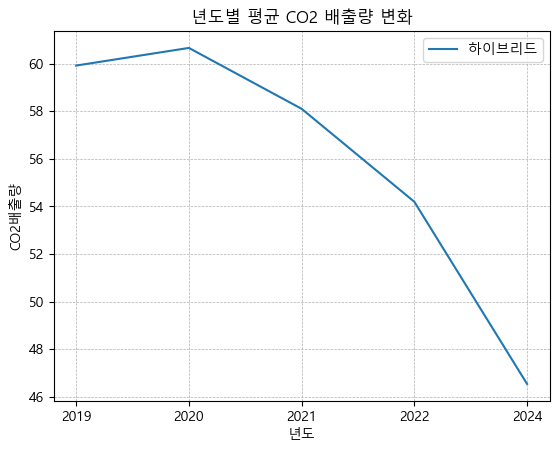

In [232]:
# CO2 배출량 변화 그래프
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

df1 = retDF1.groupby('년도')['CO2배출량'].mean()

plt.plot(df1.index, df1.values,label = '하이브리드')
plt.xlabel('년도')
plt.ylabel('CO2배출량')
plt.title('년도별 평균 CO2 배출량 변화')
# plt.ylim(0, 200)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

### 그래프로 1년 유지비 그리기 <hr>

In [233]:
mask = retDF1['모델명'].str.contains('BMW 530e', case=False, na=False) ## 대소문자 구분 안하고 na은 False로
retDF2 = retDF1[mask][['년도','1년 유지비(원)']]
display(retDF2)

,년도,1년 유지비(원)
870,2019,3814786
871,2020,3701915
872,2021,3809325
873,2022,3859122
874,2024,0
875,2024,0
876,2019,3875489
877,2020,3758893
878,2021,3874918
879,2022,3933868


In [234]:
retDF2 = retDF2[retDF2['1년 유지비(원)'] > 0]                         ## 0보다 큰 값만 남기기

ret = retDF2.groupby('년도', as_index=False)['1년 유지비(원)'].mean()  ## '년도'같은 값끼리 묶어줌. ## 인덱스는 그대로 둠
display(ret)


,년도,1년 유지비(원)
0,2019,3845137.5
1,2020,3730404.0
2,2021,3842121.5
3,2022,3896495.0


In [235]:
ret.to_excel('./BMW 5시리즈 하이브리드.xlsx')

### 파일 불러와서 유지비 시각화 하기

In [237]:
# ## 다른 팀원들 파일 불러오기
# ret1 = './BMW i5.xlsx'
# ret2 = './BMW 520d data.csv'
# ret3 = './가솔린example.csv'

# ret1 = pd.read_excel(ret1)
# ret2 = pd.read_csv(ret2)
# ret3 = pd.read_csv(ret3)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# plt.rc('font', family='Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False

# initial_price = 100_000_000  # 1억

# # -------------------------------------------------
# # ret 처리
# # -------------------------------------------------
# ret['년도'] = ret['년도'].astype(int)
# ret = ret.sort_values('년도').reset_index(drop=True)

# ret['누적유지비(원)'] = ret['1년 유지비(원)'].cumsum()
# ret['차값포함총비용(원)'] = initial_price + ret['누적유지비(원)']
# ret['총비용_억원'] = ret['차값포함총비용(원)'] / 100_000_000

# df0 = ret[['년도', '총비용_억원']].rename(columns={'총비용_억원': '총비용_억원_530e'})

# # -------------------------------------------------
# # ret1 처리
# # -------------------------------------------------
# ret1['년도'] = ret1['년도'].astype(int)
# ret1 = ret1.sort_values('년도').reset_index(drop=True)

# ret1['누적유지비(원)'] = ret1['1년 유지비(원)'].cumsum()
# ret1['차값포함총비용(원)'] = initial_price + ret1['누적유지비(원)']
# ret1['총비용_억원'] = ret1['차값포함총비용(원)'] / 100_000_000

# df1 = ret1[['년도', '총비용_억원']].rename(columns={'총비용_억원': '총비용_억원_iPerf'})

# # -------------------------------------------------
# # ret2 처리
# # -------------------------------------------------
# ret2['년도'] = ret2['년도'].astype(int)
# ret2 = ret2.sort_values('년도').reset_index(drop=True)

# ret2['누적유지비(원)'] = ret2['1년 유지비(원)'].cumsum()
# ret2['차값포함총비용(원)'] = initial_price + ret2['누적유지비(원)']
# ret2['총비용_억원'] = ret2['차값포함총비용(원)'] / 100_000_000

# df2 = ret2[['년도', '총비용_억원']].rename(columns={'총비용_억원': '총비용_억원_520d'})

# # -------------------------------------------------
# # ret3 처리
# # -------------------------------------------------
# ret3['년도'] = ret3['년도'].astype(int)
# ret3 = ret3.sort_values('년도').reset_index(drop=True)

# ret3['누적유지비(원)'] = ret3['1년 유지비(원)'].cumsum()
# ret3['차값포함총비용(원)'] = initial_price + ret3['누적유지비(원)']
# ret3['총비용_억원'] = ret3['차값포함총비용(원)'] / 100_000_000

# df3 = ret3[['년도', '총비용_억원']].rename(columns={'총비용_억원': '총비용_억원_ETC'})

# # -------------------------------------------------
# # 공통 연도 축으로 merge (outer join)
# # -------------------------------------------------
# merged = (
#     df0.merge(df1, on='년도', how='outer')
#        .merge(df2, on='년도', how='outer')
#        .merge(df3, on='년도', how='outer')
#        .sort_values('년도')
#        .reset_index(drop=True)
# )

# # -------------------------------------------------
# # (핵심) "증가폭 누적 보간" 적용
# # -------------------------------------------------
# merged_interp = merged.set_index('년도')

# for col in merged_interp.columns:
#     s = merged_interp[col].copy()
#     for i in range(1, len(s)):
#         if pd.isna(s.iloc[i]):  # 결측값이면
#             prev = s.iloc[i - 1]
#             if i >= 2:
#                 delta = s.iloc[i - 1] - s.iloc[i - 2]  # 이전 증가폭 유지
#                 s.iloc[i] = prev + delta
#             else:
#                 s.iloc[i] = prev  # 첫 번째 구간은 이전값 그대로 유지
#     merged_interp[col] = s

# # 앞/뒤 결측이 남았다면 가까운 값으로 채워줌
# merged_interp = merged_interp.fillna(method='bfill').fillna(method='ffill')
# merged_interp = merged_interp.reset_index()

# # -------------------------------------------------
# # 플롯 데이터 준비
# # -------------------------------------------------
# x_years = merged_interp['년도']
# y_530e   = merged_interp['총비용_억원_530e']
# y_iPerf  = merged_interp['총비용_억원_iPerf']
# y_520d   = merged_interp['총비용_억원_520d']
# y_etc    = merged_interp['총비용_억원_ETC']

# # -------------------------------------------------
# # 그래프 시각화
# # -------------------------------------------------
# plt.figure(figsize=(8,5))

# plt.plot(x_years, y_530e,  marker='o', label='BMW 530e')
# plt.plot(x_years, y_iPerf, marker='o', label='BMW 530e iPerformance')
# plt.plot(x_years, y_520d,  marker='o', label='BMW 520d')
# plt.plot(x_years, y_etc,   marker='o', label='(ret3 차량)')

# plt.xlabel('년도')
# plt.ylabel('가격(억원)')
# plt.title("이서범 바보~~")#'년도별 총 차량 소유 비용 (초기가격 1억 가정, 증가폭 누적 보간)')
# plt.grid(True, linestyle='--', linewidth=0.5)
# plt.legend()
# plt.show()
